###### 

<h1 style="text-align:center;">Rain Predictor</h1>


<h3 style="text-align:center;">Logistic Regression Model</h3>

<h3 style="text-align:center;">By Adarsh S. Vimal</h3>

##### 

###### 

### Linear Regression for Solving Regression Problems

Linear regression is a commonly used technique for solving regression problems. In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. The predictions from the model are evaluated using a loss function like the Root Mean Squared Error (RMSE).


Visual Summary:

<img src="https://i.imgur.com/iTM2s5k.png" width="480">

#### 

#### 

## Logistic Regression
Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:
> 1. We take linear combination (or weighted sum of the input features)
> 2. We apply the sigmoid function to the result to obtain a number between 0 and 1
> 3. This number represents the probability of the input being classified as "Yes"
> 4. Instead of RMSE, the Cross Entropy Loss function is used to evaluate the results


Visual Summary:


<img src="https://i.imgur.com/YMaMo5D.png" width="480">


The sigmoid function applied to the linear combination of inputs has the following formula:


<img src="https://i.imgur.com/sAVwvZP.png" width="400">


The output of the sigmoid function is called a logistic, hence the name _logistic regression_. In short, we have to evaluate the Weights and the Biases by optimising (minimising) the loss function.


#### 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 

#### Reading, Exploring and Cleaning the Data

In [2]:
RawData = pd.read_csv("weatherdata.csv")
RawData.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [3]:
RawData['Rainfall'].fillna(np.mean(RawData['Rainfall']), inplace = True)
RawData.dropna(inplace = True)

In [4]:
Data = RawData.sort_values(by='Date')
Data.drop(['MinTemp','MaxTemp','Evaporation', 'WindGustDir', 
           'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 
           'WindSpeed3pm', 'Pressure9am','Pressure3pm'], axis=1, inplace=True)
Data.reset_index(drop =True,inplace = True)
Data.index += 1

In [5]:
Data['Humidity'] = Data.apply(lambda row: (row['Humidity9am'] + row['Humidity3pm']) / 2, axis=1)
Data['Cloud'] = Data.apply(lambda row: (row['Cloud9am'] + row['Cloud3pm']) / 2, axis=1)
Data['Temp'] = Data.apply(lambda row: (row['Temp9am'] + row['Temp3pm']) / 2, axis=1)

In [6]:
Data.drop(['Humidity9am', 'Humidity3pm', 'Cloud9am', 
           'Cloud3pm', 'Temp9am','Temp3pm'],axis=1,inplace=True)

In [7]:
Data = Data[['Date', 'Location', 'Rainfall', 'Sunshine',
             'Humidity', 'Cloud', 'Temp', 'RainToday', 'RainTomorrow']]

In [8]:
Data['RainToday'] =Data['RainToday'].astype('category')
Data['RainToday'] =Data['RainToday'].cat.codes
Data['RainTomorrow'] =Data['RainTomorrow'].astype('category')
Data['RainTomorrow'] =Data['RainTomorrow'].cat.codes
Data

,Date,Location,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday,RainTomorrow
1,2007-11-01,Canberra,0.0,6.3,48.5,7.0,19.00,0,1
2,2007-11-02,Canberra,3.6,9.7,58.0,4.0,21.60,1,1
3,2007-11-03,Canberra,3.6,3.3,75.5,7.5,17.80,1,1
4,2007-11-04,Canberra,39.8,9.1,59.0,4.5,13.80,1,1
5,2007-11-05,Canberra,2.8,10.6,58.5,7.0,13.25,1,0
...,...,...,...,...,...,...,...,...,...
56416,2017-06-25,Brisbane,0.0,9.8,60.5,4.5,19.25,0,0
56417,2017-06-25,PerthAirport,0.0,7.9,56.5,2.0,14.10,0,0
56418,2017-06-25,Melbourne,0.0,3.8,61.5,7.0,11.35,0,1
56419,2017-06-25,Perth,0.0,7.9,62.0,2.0,13.55,0,0


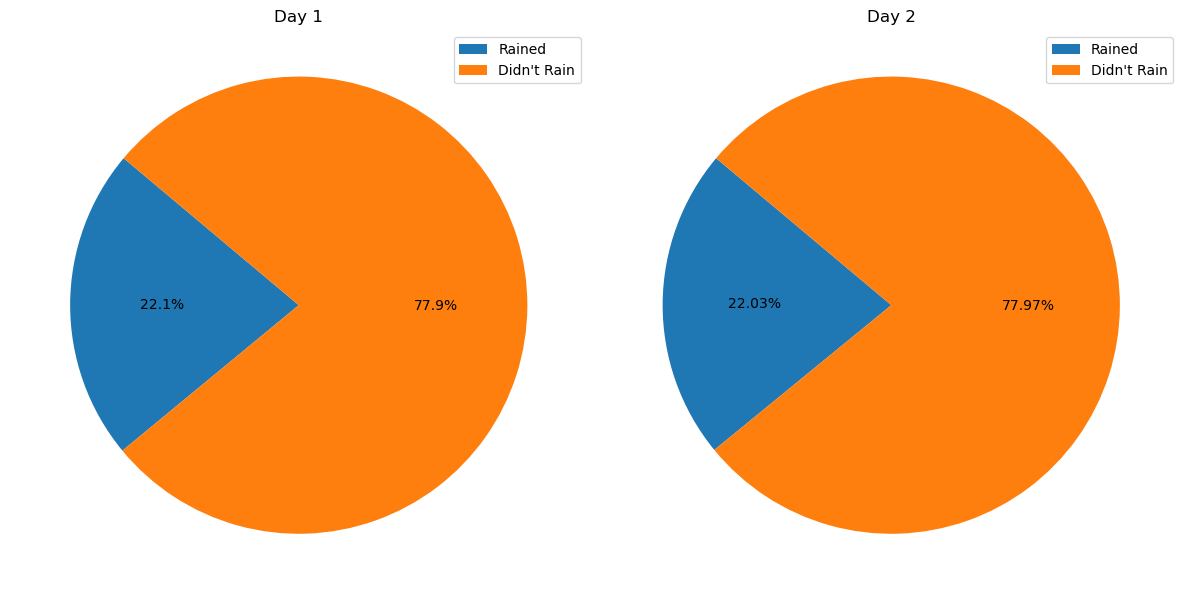

In [9]:
# Data for RainToday and RainTomorrow
labels = ['Rained', "Didn't Rain"]
Count0_today = (Data.query('RainToday == 0')).shape[0]
Count1_today = (Data.query('RainToday == 1')).shape[0]
PCT_today = [Count1_today / (Count0_today + Count1_today), 
             Count0_today / (Count0_today + Count1_today)]

Count0_tomorrow = (Data.query('RainTomorrow == 0')).shape[0]
Count1_tomorrow = (Data.query('RainTomorrow == 1')).shape[0]
PCT_tomorrow = [Count1_tomorrow /(Count0_tomorrow + Count1_tomorrow), 
                Count0_tomorrow/(Count0_tomorrow + Count1_tomorrow)]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for RainToday
axs[0].pie(PCT_today, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Day 1')
axs[0].legend(labels, loc="best")

# Plot for RainTomorrow
axs[1].pie(PCT_tomorrow, autopct='%1.2f%%', startangle=140)
axs[1].set_title('Day 2')
axs[1].legend(labels, loc="best")

# Equal aspect ratio ensures that pies are drawn as circles
axs[0].axis('equal')
axs[1].axis('equal')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


#### 

#### Building the Model

In [10]:
#Defining the X and Y variables
X = Data.drop(columns = ['RainTomorrow','Date','Location'])
Y = Data['RainTomorrow']

In [11]:
X

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
1,0.0,6.3,48.5,7.0,19.00,0
2,3.6,9.7,58.0,4.0,21.60,1
3,3.6,3.3,75.5,7.5,17.80,1
4,39.8,9.1,59.0,4.5,13.80,1
5,2.8,10.6,58.5,7.0,13.25,1
...,...,...,...,...,...,...
56416,0.0,9.8,60.5,4.5,19.25,0
56417,0.0,7.9,56.5,2.0,14.10,0
56418,0.0,3.8,61.5,7.0,11.35,0
56419,0.0,7.9,62.0,2.0,13.55,0


In [12]:
Y

1        1
2        1
3        1
4        1
5        0
        ..
56416    0
56417    0
56418    1
56419    0
56420    0
Name: RainTomorrow, Length: 56420, dtype: int8

In [13]:
XTrain,XTest,YTrain,YTest = train_test_split(X,Y, 
                                             test_size = 0.20,
                                             random_state = 69)

In [14]:
XTest

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
496,0.0,5.1,43.0,5.5,14.30,0
47741,0.0,9.9,32.5,0.5,22.55,0
44763,0.0,7.2,63.0,5.0,25.80,0
35858,6.4,9.5,59.0,5.0,11.20,1
20165,36.8,2.2,79.0,7.0,17.70,1
...,...,...,...,...,...,...
5740,0.0,10.3,27.0,0.5,22.10,0
30651,0.0,5.1,75.0,6.5,24.70,0
46868,0.0,9.2,49.5,0.5,16.00,0
50294,0.0,12.3,18.5,1.5,32.70,0


In [15]:
YTest

496      0
47741    0
44763    0
35858    0
20165    1
        ..
5740     0
30651    0
46868    0
50294    0
50394    1
Name: RainTomorrow, Length: 11284, dtype: int8

In [16]:
XTrain

,Rainfall,Sunshine,Humidity,Cloud,Temp,RainToday
36848,0.0,13.7,32.0,2.0,25.65,0
9511,0.0,3.2,59.0,8.0,17.90,0
22706,0.0,11.1,68.0,4.0,19.25,0
31266,0.0,13.1,37.5,0.0,20.25,0
2632,0.0,11.0,38.0,3.0,18.55,0
...,...,...,...,...,...,...
11826,1.0,9.3,49.5,1.0,19.90,0
47509,0.0,7.8,49.0,5.0,19.25,0
25016,0.0,12.0,59.5,1.5,26.80,0
9819,0.0,13.2,38.5,1.0,26.70,0


In [17]:
YTrain

36848    0
9511     0
22706    0
31266    0
2632     0
        ..
11826    0
47509    0
25016    0
9819     0
4042     0
Name: RainTomorrow, Length: 45136, dtype: int8

In [18]:
sclr = StandardScaler()
Scaled_XTrain = sclr.fit_transform(XTrain)
Scaled_XTest = sclr.transform(XTest)

In [19]:
Scaled_XTrain

array([[-0.30178419,  1.5861052 , -1.44748703, -0.93154165,  0.79943525,
        -0.5328359 ],
       [-0.30178419, -1.20906654,  0.07238417,  1.51914741, -0.39651555,
        -0.5328359 ],
       [-0.30178419,  0.89396744,  0.57900791, -0.11464529, -0.18818864,
        -0.5328359 ],
       ...,
       [-0.30178419,  1.13355359,  0.10052994, -1.13576573,  0.97689892,
        -0.5328359 ],
       [-0.30178419,  1.45300178, -1.08159211, -1.33998982,  0.96146729,
        -0.5328359 ],
       [-0.30178419,  0.38817446, -1.58821585, -1.13576573, -0.24219932,
        -0.5328359 ]])

In [20]:
Scaled_XTest

array([[-0.30178419, -0.70327356, -0.82828024,  0.49802697, -0.95205399,
        -0.5328359 ],
       [-0.30178419,  0.57451924, -1.41934127, -1.54421391,  0.32105493,
        -0.5328359 ],
       [-0.30178419, -0.14423921,  0.29755028,  0.29380288,  0.82258269,
        -0.5328359 ],
       ...,
       [-0.30178419,  0.38817446, -0.46238533, -1.54421391, -0.6897164 ,
        -0.5328359 ],
       [-0.30178419,  1.21341564, -2.20742263, -1.13576573,  1.88736469,
        -0.5328359 ],
       [-0.30178419,  0.81410539,  0.38198757, -0.52309347,  1.48614249,
        -0.5328359 ]])

In [21]:
#finding the Coefficients and Intercept
log_reg = LogisticRegression(random_state=69,
                            C=0.1,
                            fit_intercept=True).fit(Scaled_XTrain,
                                                  YTrain)

In [22]:
YPred = log_reg.predict(Scaled_XTest)

#### Bias

In [23]:
b = log_reg.intercept_[0]
b

-1.758703754652508

#### Weights

In [24]:
w = pd.DataFrame({"Coefficients": log_reg.coef_[0]}, 
                       index=['Rainfall', 'Sunshine', 'Humidity', 
                              'Cloud', 'Temp', 'RainToday'])
w

,Coefficients
Rainfall,0.100030
Sunshine,-0.655020
Humidity,0.661414
Cloud,0.325810
Temp,0.303134
RainToday,0.217278


#### 

#### Confusion Matrix

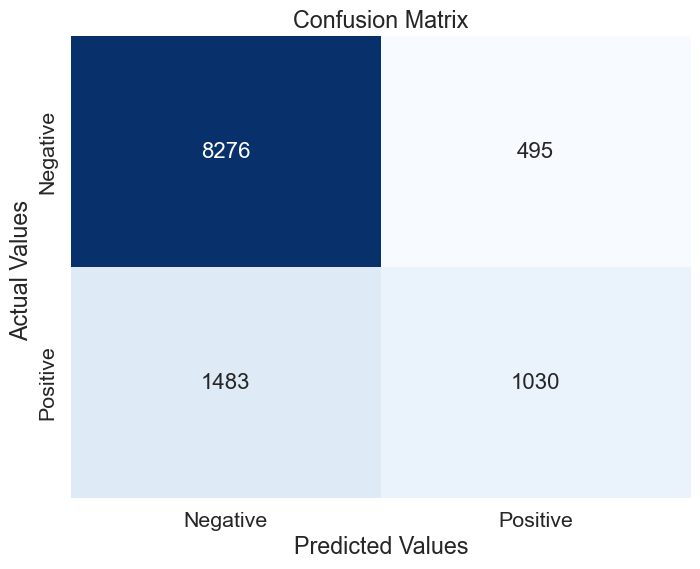

In [25]:
#Generate confusion matrix
conf_matrix = confusion_matrix(YTest, YPred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, 
            fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],  # Set column labels
            yticklabels=['Negative', 'Positive'])  # Set row labels
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values ')
plt.title('Confusion Matrix')
plt.show()

#### 

#### Accuracy

In [26]:
accuracy_Test = log_reg.score(Scaled_XTest, YTest)
accuracy_Train = log_reg.score(Scaled_XTrain, YTrain)
labels = ['With Test Data', 'With Training Data']
accuracies = [accuracy_Test * 100,accuracy_Train * 100]

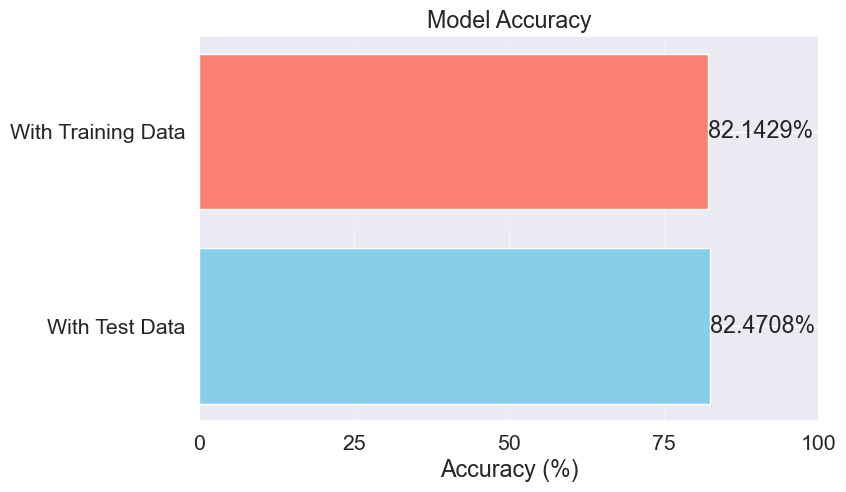

In [27]:
# Create horizontal bar graph
plt.figure(figsize=(8, 5))
plt.barh(labels, accuracies, color=['skyblue', 'salmon'])
plt.xlabel('Accuracy (%)')  # Adjusted xlabel for clarity
plt.title('Model Accuracy')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Adjusted alpha value for grid visibility

# Display the values on the bars
for i, acc in enumerate(accuracies):
    plt.text(acc, i, f'{acc:.4f}%', va='center')

plt.xticks(ticks=[0, 25, 50, 75, 100], labels=['0', '25', '50', '75', '100']) 
plt.show()


#### 

#### Model (Graphical Visualisation)

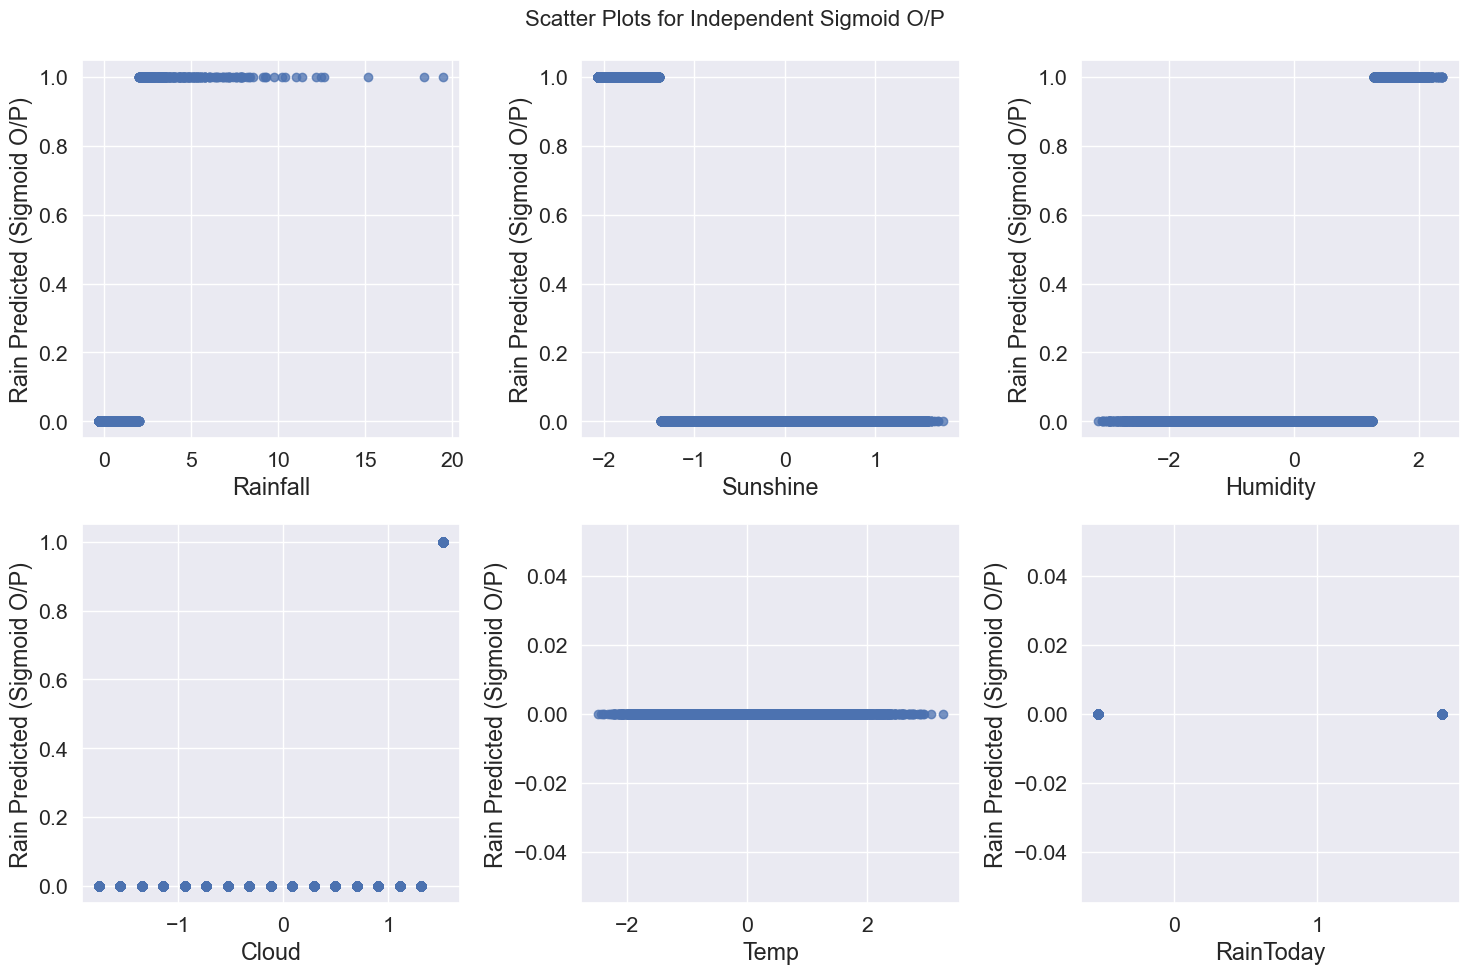

In [28]:
# List of independent variables
Ind_Variables = ['Rainfall', 'Sunshine', 'Humidity', 'Cloud', 'Temp', 'RainToday']

# Function to convert input data to series
def get_Series(DF):
    series_list = []
    for i in range(DF.shape[1]):
        series_data = DF[:, i]
        series = pd.DataFrame(series_data, index=np.arange(1, len(series_data)+1))
        series_list.append(series)
    return series_list

# Calling the function
TrainVars = get_Series(Scaled_XTrain)
Test_Vars = get_Series(Scaled_XTest)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each independent variable against the sigmoid output
for i in range(len(TrainVars)):
    # Fit logistic regression model
    model = LogisticRegression(random_state=69, C=0.1, fit_intercept=True).fit(TrainVars[i], YTrain)
    
    # Predict using the fitted model
    Y_Var = model.predict(Test_Vars[i])
    
    # Plot scatter plot
    ax = axes[i]
    ax.scatter(Test_Vars[i].values.flatten(), Y_Var, alpha=0.75)
    ax.set_xlabel(f'{Ind_Variables[i]}')
    ax.set_ylabel('Rain Predicted (Sigmoid O/P)')
    ax.grid(True)
    
#Title
plt.suptitle('Scatter Plots for Independent Sigmoid O/P', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()

#### 

#### 

#### 

<h3 style="text-align:center;">Model Summary</h3>

#### Interpreting the Bias and the Coefficients 

- **Bias**: -1.7587
  - *Intercept of the model.*
  - *A negative bias suggests that, without any input variables, the model leans towards predicting no rain.*

- **Rainfall**: 0.100030
  - *A positive weight, indicating that higher rainfall today increases the likelihood of rain tomorrow.*

- **Sunshine**: -0.655020
  - *A negative weight, suggesting that more sunshine today decreases the likelihood of rain tomorrow.*

- **Humidity**: 0.66414
  - *A positive weight, showing that higher humidity today increases the likelihood of rain tomorrow.*

- **Cloud**: 0.325810
  - *A positive weight, meaning that more cloud cover today increases the likelihood of rain tomorrow.*

- **Temp**: 0.303134
  - *A positive weight, indicating that higher temperatures today are associated with a higher likelihood of rain tomorrow.*

- **RainToday**: 0.217278
  - *A positive weight, implying that if it rained today, it increases the likelihood of rain tomorrow.*

The weights reflect the strength and direction of the relationship between each predictor variable and the target variable (rain tomorrow). The model predicts rain when the combined weighted sum of these variables, plus the bias, is greater than zero.
